<a href="https://colab.research.google.com/github/yaraeslamm/Medical_Segmentation/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title mounting the drive & some imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing import image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/MedDatasetTrial'

Mounted at /content/drive


In [ ]:
#@title loading images
# # Function to load images and their corresponding masks
# def load_images_and_masks(image_dir, mask_dir, img_size=(224, 224)):
#     # Get paths of all images and masks
#     image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
#     mask_paths = [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]

#     images = []
#     masks = []

#     for img_path, mask_path in zip(image_paths, mask_paths):

#         print(f"Loading image: {img_path} and mask: {mask_path}")
#         # Load and resize the image
#         img = image.load_img(img_path, target_size=img_size, color_mode='grayscale')
#         img = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

#         # Load and resize the mask (grayscale also)
#         mask = image.load_img(mask_path, target_size=img_size, color_mode='grayscale')
#         mask = image.img_to_array(mask) / 255.0  # Normalize to [0, 1]

#         # # Ensure both image and mask are in 2D shape (height, width)
#         images.append(img)  # Remove single channel dimension (grayscale)
#         masks.append(mask)  # Remove single channel dimension (grayscale)

#     return np.array(images), np.array(masks)

# # Load training, validation, and testing data
# X_train, y_train = load_images_and_masks(
#     base_dir + '/Training/images',
#     base_dir + '/Training/masks'
# )

# X_val, y_val = load_images_and_masks(
#     base_dir + '/Validation/images',
#     base_dir + '/Validation/masks'
# )

# X_test, y_test = load_images_and_masks(
#     base_dir + '/Testing/images',
#     base_dir + '/Testing/masks'
# )

# # Verify the shapes of loaded data
# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)
# print(X_test.shape, y_test.shape)


import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to load images and their corresponding masks, manually matching by filename
def load_images_and_masks(image_dir, mask_dir, img_size=(224, 224)):
    # Get the filenames of all images and masks
    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    # Ensure the filenames have the same length (image and mask count should match)
    assert len(image_filenames) == len(mask_filenames), "Mismatch between number of images and masks!"

    images = []
    masks = []

    for img_filename in image_filenames:
        # Extract the common base name (without extension) to match the mask
        base_name = os.path.splitext(img_filename)[0]

        print(base_name)

        # Find the corresponding mask filename (must match base_name)
        mask_filename = f"{base_name}.png"  # Assuming masks are also PNG files
        if mask_filename not in mask_filenames:
            print(f"Warning: No corresponding mask found for image {img_filename}. Skipping.")
            continue  # Skip if no corresponding mask is found

        # Load and resize the image
        img_path = os.path.join(image_dir, img_filename)
        img = image.load_img(img_path, target_size=img_size, color_mode='grayscale')
        img = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

        # Load and resize the mask (grayscale)
        mask_path = os.path.join(mask_dir, mask_filename)
        mask = image.load_img(mask_path, target_size=img_size, color_mode='grayscale')
        mask = image.img_to_array(mask) / 255.0  # Normalize to [0, 1]


        print(f"Loading image: {img_path} and mask: {mask_path}")

        # Append the loaded image and mask
        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)


# Example usage
X_train, y_train = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Training/images',
    '/content/drive/MyDrive/MedDatasetTrial/Training/masks'
)

X_val, y_val = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Validation/images',
    '/content/drive/MyDrive/MedDatasetTrial/Validation/masks'
)

X_test, y_test = load_images_and_masks(
    '/content/drive/MyDrive/MedDatasetTrial/Testing/images',
    '/content/drive/MyDrive/MedDatasetTrial/Testing/masks'
)

# Verify the shapes of loaded data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)



1
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1.png
10
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/10.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/10.png
100
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/100.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/100.png
1000
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1000.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1000.png
1001
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1001.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1001.png
1002
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1002.png and mask: /content/drive/MyDrive/MedDatasetTrial/Training/masks/1002.png
1003
Loading image: /content/drive/MyDrive/MedDatasetTrial/Training/images/1

Number of channels in X_train: 224
Shape of X_train: (1400, 224, 224, 1)
Min and Max pixel values in X_train:
Min: images  0.0
Max: images 1.0
Min: mask  0.0
Max: mask  1.0
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


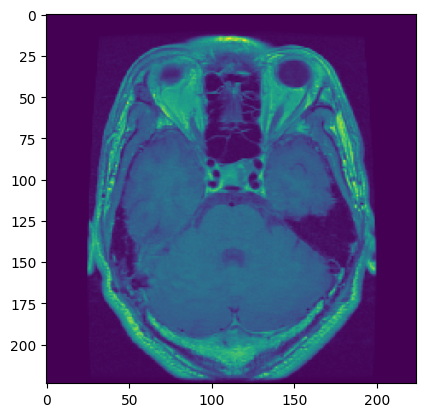

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


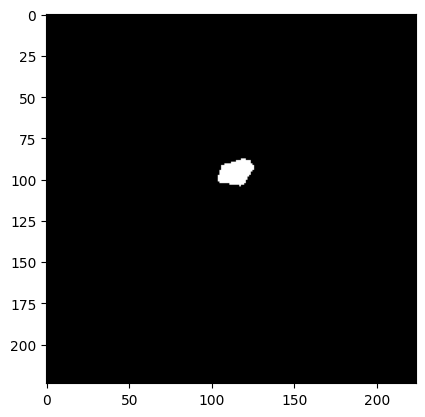

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


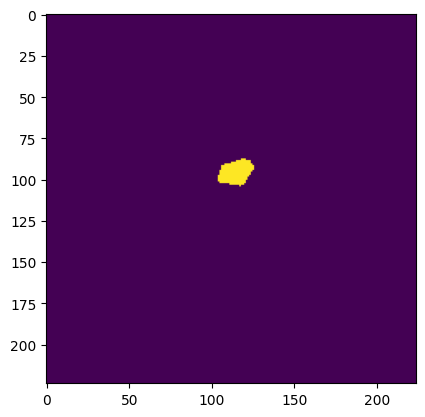

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


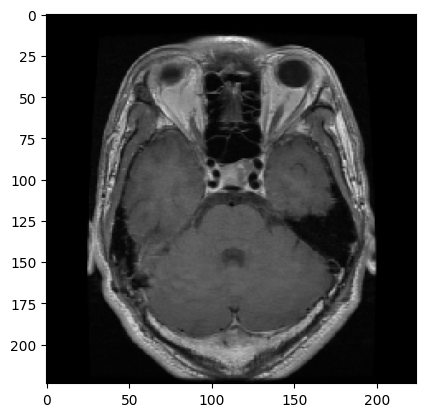

In [ ]:
#@title some print statements to check the data
# Check the number of channels
print("Number of channels in X_train:", X_train.shape[2])
print("Shape of X_train:", X_train.shape)

# Check if the images are normalized (assuming they should be in the range [0, 1])
print("Min and Max pixel values in X_train:")
print("Min: images ", X_train.min())
print("Max: images", X_train.max())

print("Min: mask ", y_train.min())
print("Max: mask ", y_train.max())

print(y_train[15])
plt.figure()
plt.imshow(X_train[15])
plt.show()

# show a training sample
print(y_train[15])
plt.figure()
plt.imshow(y_train[15],cmap='gray')
plt.show()

print(y_train[15])
plt.figure()
plt.imshow(y_train[15])
plt.show()

# show a training sample
print(y_train[15])
plt.figure()
plt.imshow(X_train[15],cmap='gray')
plt.show()




In [ ]:
tolerance = 1e-5  # You can adjust this tolerance
binary_y_train = np.isclose(y_train, 0, atol=tolerance) | np.isclose(y_train, 1, atol=tolerance)

# Check if all values are close enough to 0 or 1
print("Are all y_train values binary (0 or 1 within tolerance)?", np.all(binary_y_train))


Are all y_train values binary (0 or 1 within tolerance)? True


In [ ]:
#@title some print statements to check the data
# Verify the shapes of loaded data
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Check the minimum and maximum values of the images and masks
print(f"Training images min: {np.min(X_train)}, max: {np.max(X_train)}")
print(f"Training masks min: {np.min(y_train)}, max: {np.max(y_train)}")

print(f"Validation images min: {np.min(X_val)}, max: {np.max(X_val)}")
print(f"Validation masks min: {np.min(y_val)}, max: {np.max(y_val)}")

print(f"Testing images min: {np.min(X_test)}, max: {np.max(X_test)}")
print(f"Testing masks min: {np.min(y_test)}, max: {np.max(y_test)}")


Training data shape: (1400, 224, 224, 1) (1400, 224, 224, 1)
Validation data shape: (300, 224, 224, 1) (300, 224, 224, 1)
Testing data shape: (300, 224, 224, 1) (300, 224, 224, 1)
Training images min: 0.0, max: 1.0
Training masks min: 0.0, max: 1.0
Validation images min: 0.0, max: 1.0
Validation masks min: 0.0, max: 1.0
Testing images min: 0.0, max: 1.0
Testing masks min: 0.0, max: 1.0


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 224, 224,  │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 224, 224,  │      2,320 │ conv2d_15[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 112, 112,  │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 112, 112,  │      4,640 │ max_pooling2d_3[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 112, 112,  │      9,248 │ conv2d_17[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 56, 56,    │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 56, 56,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 56, 56,    │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 28, 28,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 28, 28,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 28, 28,    │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 56, 56,    │          0 │ conv2d_22[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 56, 56,    │          0 │ up_sampling2d_3[… │
│ (Concatenate)       │ 192)              │            │ conv2d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 56, 56,    │    110,656 │ concatenate_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 56, 56,    │     36,928 │ conv2d_23[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 112, 112,  │          0 │ conv2d_24[0][0] 

 Total params: 487,009 (1.86 MB)

 Trainable params: 487,009 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 693s 8s/step - accuracy: 0.9822 - dice_coef: 0.0275 - loss: 0.2265 - mean_io_u_1: 0.4920 - precision_1: 0.0016 - recall_1: 1.6853e-04 - val_accuracy: 0.9847 - val_dice_coef: 0.0191 - val_loss: 0.0812 - val_mean_io_u_1: 0.4923 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 742s 8s/step - accuracy: 0.9846 - dice_coef: 0.0852 - loss: 0.0581 - mean_io_u_1: 0.4923 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.9847 - val_dice_coef: 0.0303 - val_loss: 0.0767 - val_mean_io_u_1: 0.4923 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 740s 8s/step - accuracy: 0.9846 - dice_coef: 0.1344 - loss: 0.0533 - mean_io_u_1: 0.4923 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.9847 - val_dice_coef: 0.0900 - val_loss: 0.0644 - val_mean_io_u_1: 0.4923 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/40
88/88 ━━━━━━━━━━━━

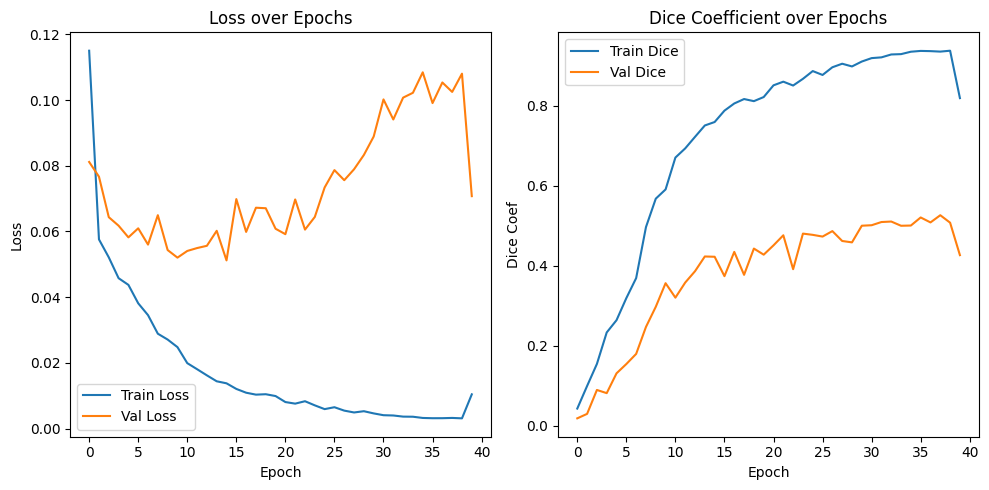

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9969 - dice_coef: 0.7254 - loss: 0.0091 - mean_io_u_1: 0.5034 - precision_1: 0.7903 - recall_1: 0.8039
Test Loss: 0.0105
Test Accuracy: 0.9964
Precision: 0.7860
Recall: 0.7714
Mean IoU: 0.4996
Dice Coefficient: 0.7019
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step


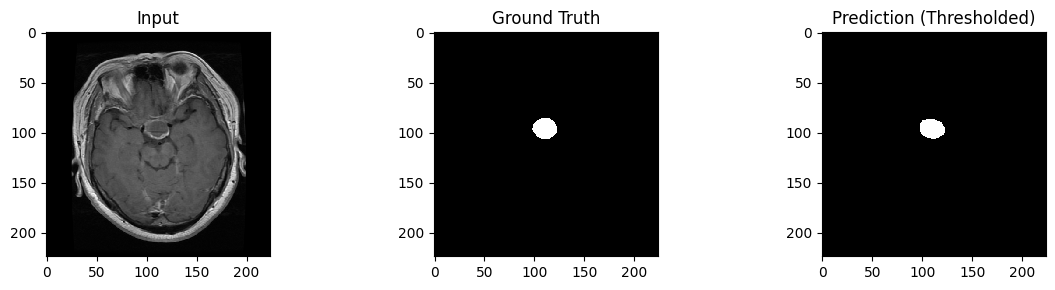

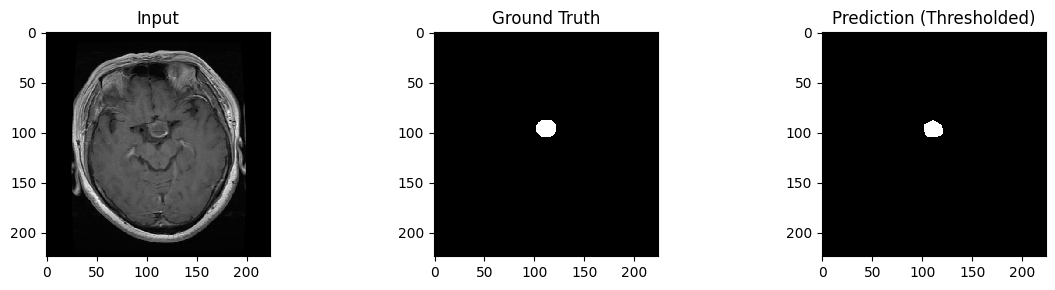

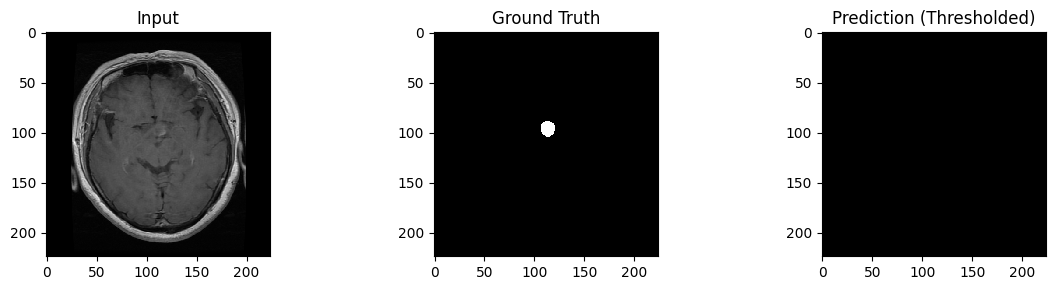

In [ ]:
#@title model & training & evaluation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU,Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import backend as K

# ----------------------------
# Parameters
# ----------------------------
IMG_SHAPE = (224, 224, 1)
BATCH_SIZE = 16
EPOCHS = 20

# ----------------------------
# Dice Metric & Loss
# ----------------------------

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersect = K.sum(y_true_f * y_pred_f)
    return (2. * intersect + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

# ----------------------------
# CNN Segmentation Model
# ----------------------------

def build_unet(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)

    # Bottleneck
    c4 = layers.Conv2D(128, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.UpSampling2D()(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(64, 3, activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, 3, activation='relu', padding='same')(c5)

    u6 = layers.UpSampling2D()(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(32, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(32, 3, activation='relu', padding='same')(c6)

    u7 = layers.UpSampling2D()(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(16, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(16, 3, activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)

    return models.Model(inputs, outputs)

# ----------------------------
# Build & Compile Model
# ----------------------------

model = build_unet(IMG_SHAPE)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy', Precision(), Recall(), MeanIoU(num_classes=2),dice_coef]
)

model.summary()

# ----------------------------
# Training
# ----------------------------

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=16,
    epochs=40,
    callbacks=[checkpoint]
)

# ----------------------------
# Plot Loss & Dice
# ----------------------------

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coef'], label='Train Dice')
plt.plot(history.history['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice Coef')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# Evaluation
# ----------------------------

loss, acc, precision, recall, mean_iou, dice = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")




# Save the trained model to a file
model.save('/content/drive/MyDrive/feedForwardSegmentation_model.keras')

# ----------------------------
# Visualization
# ----------------------------

# Apply thresholding to predictions
threshold = 0.5

preds = model.predict(X_test)

binary_preds = (preds > threshold).astype(np.float32)


# Display results
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")

    plt.subplot(1, 3, 3)
    plt.imshow(binary_preds[i].squeeze(), cmap='gray')
    plt.title("Prediction (Thresholded)")

    plt.tight_layout()
    plt.show()

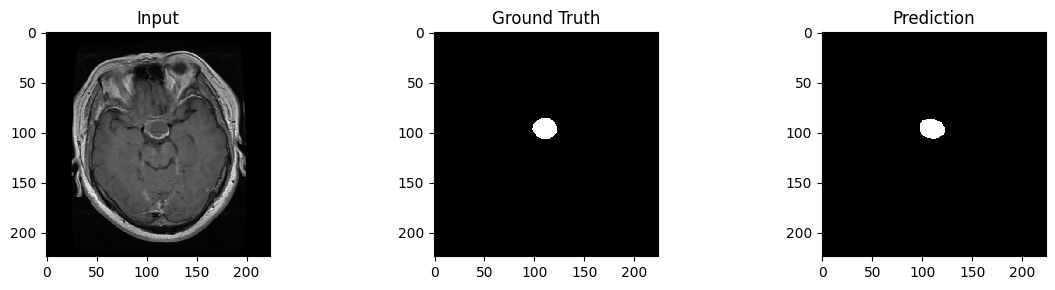

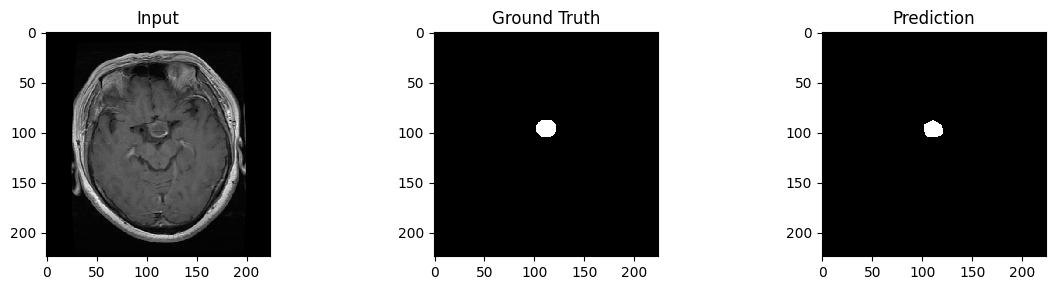

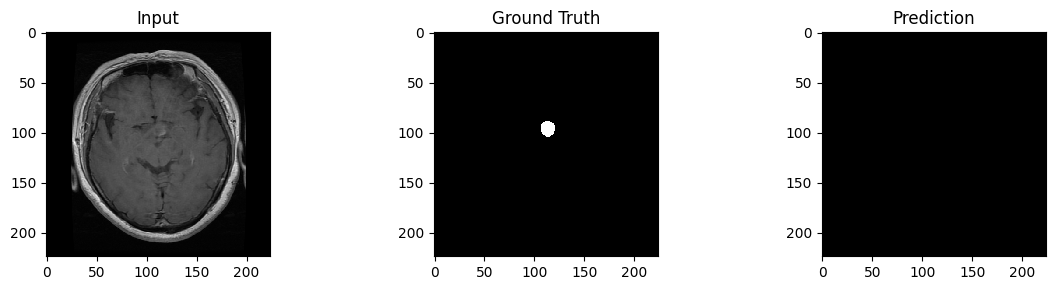

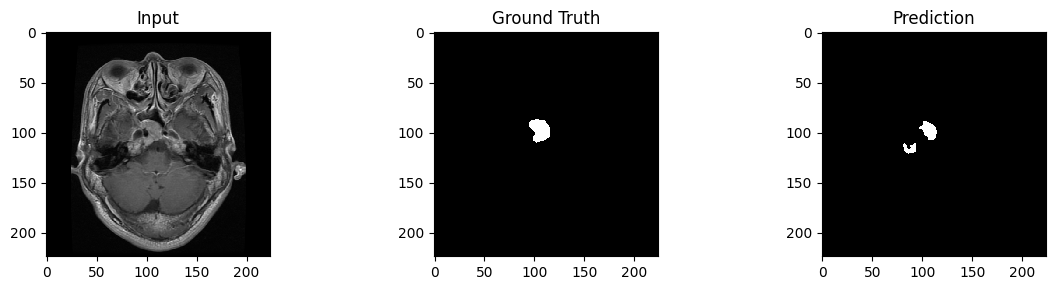

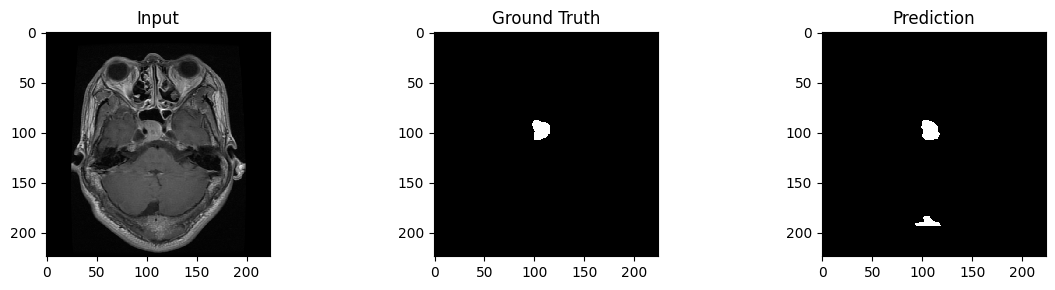

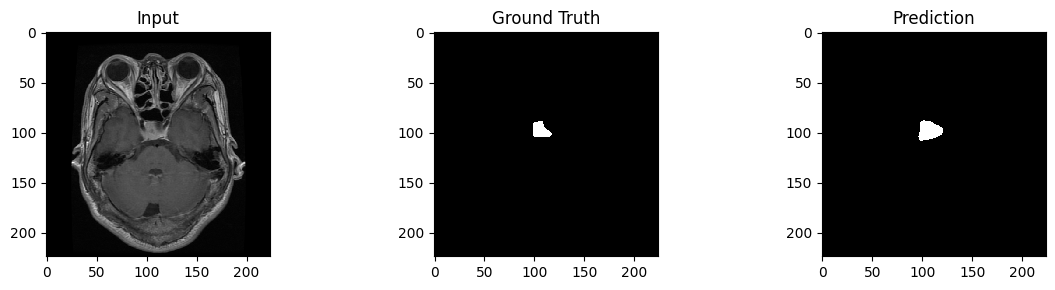

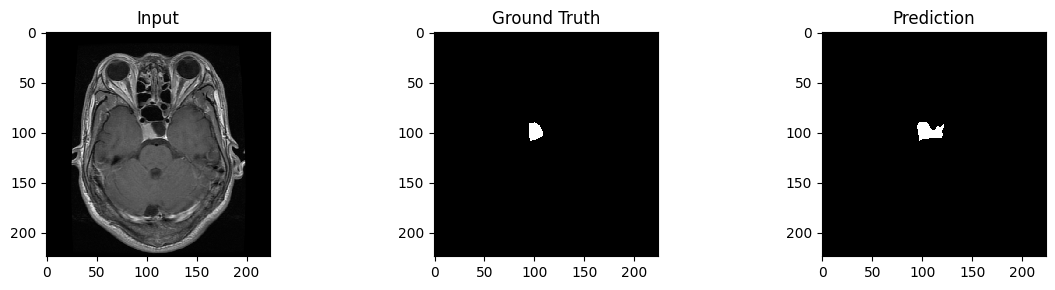

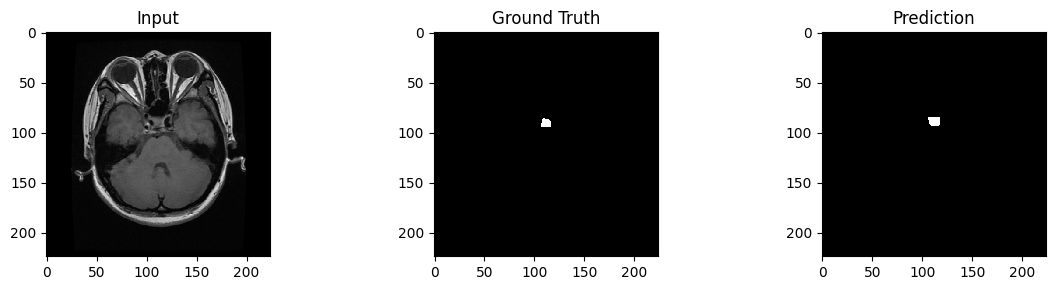

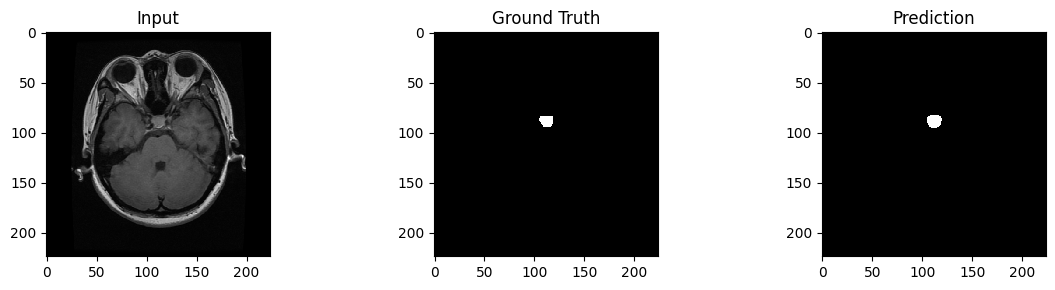

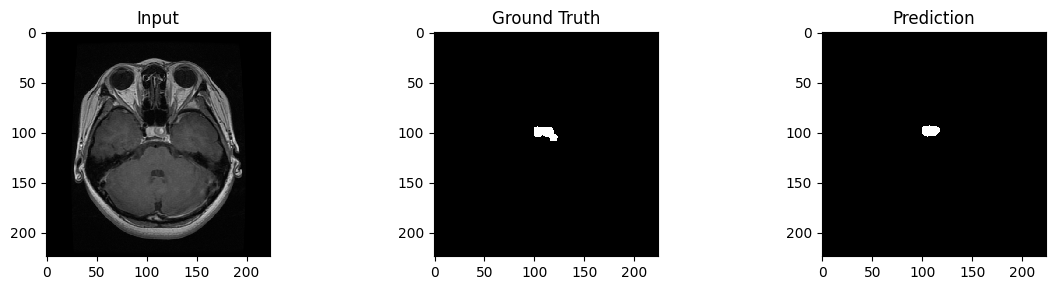

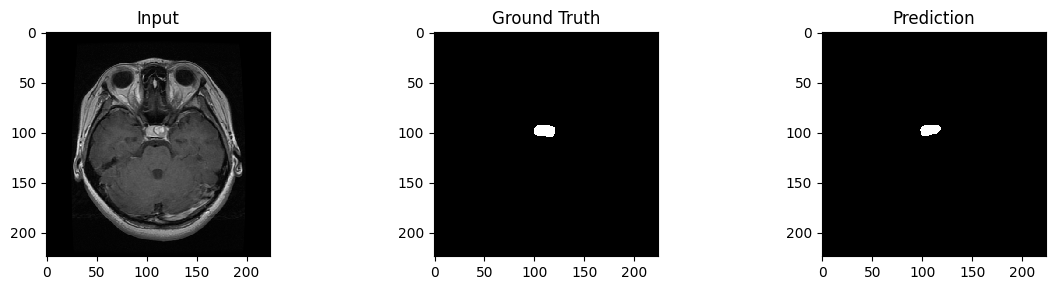

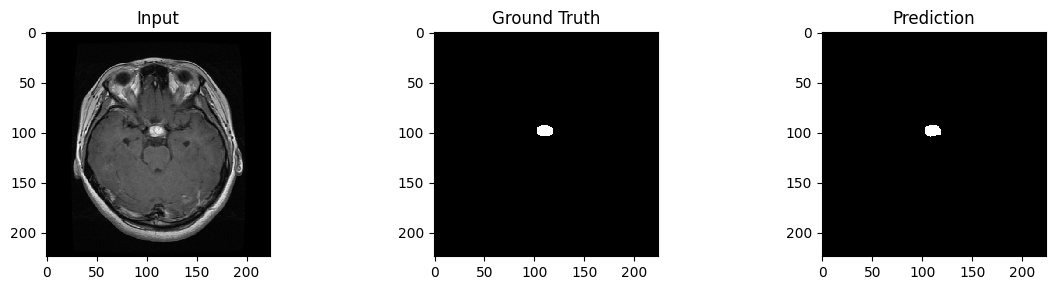

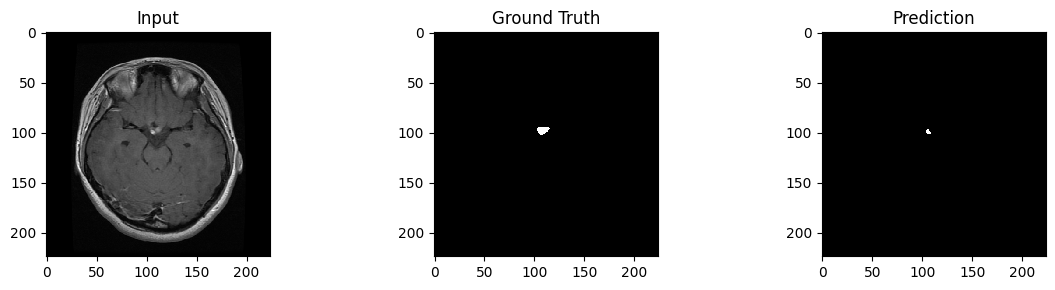

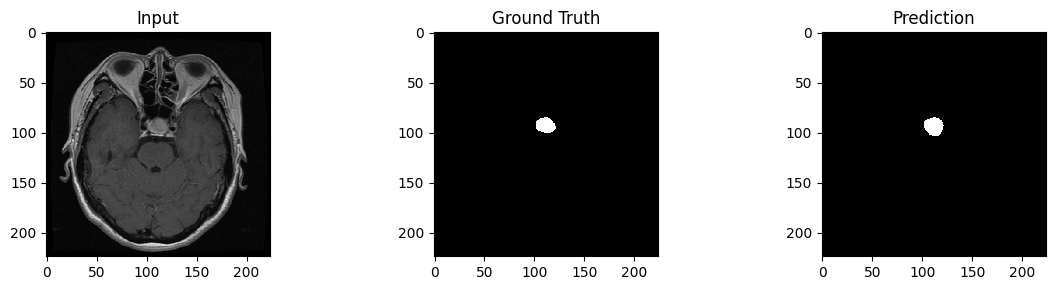

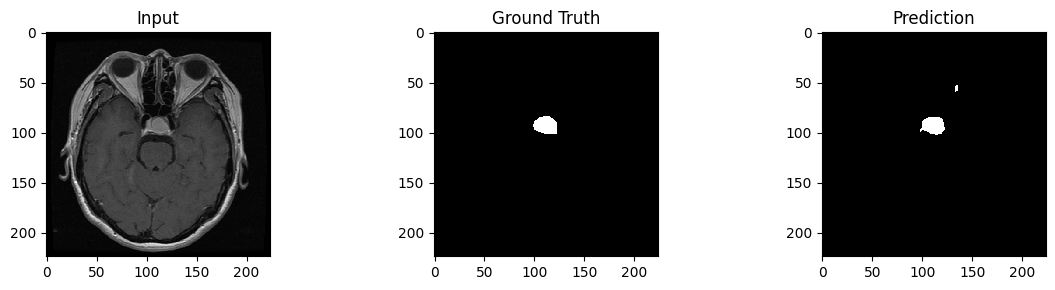

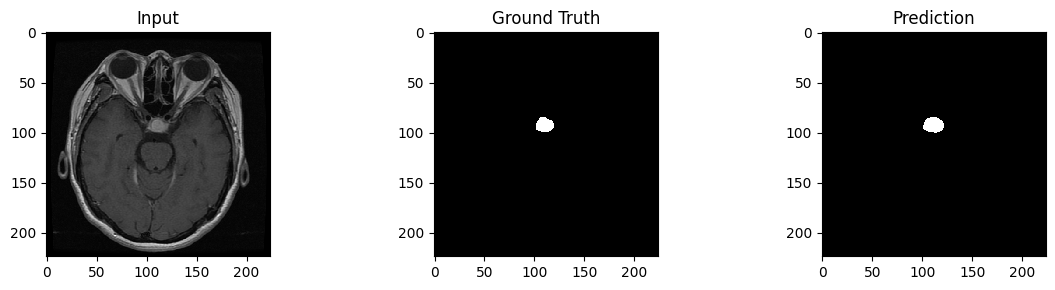

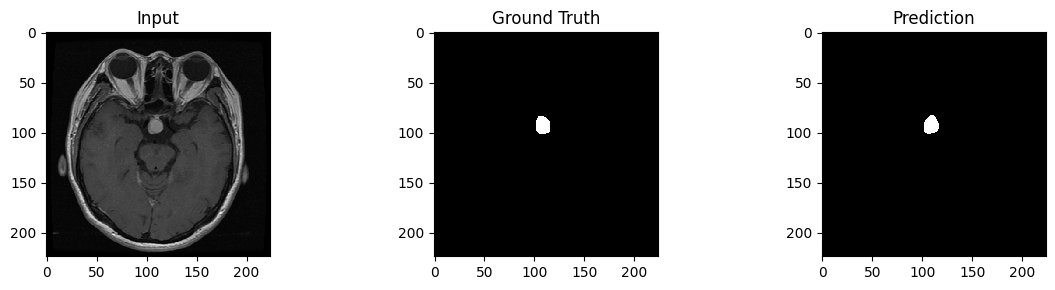

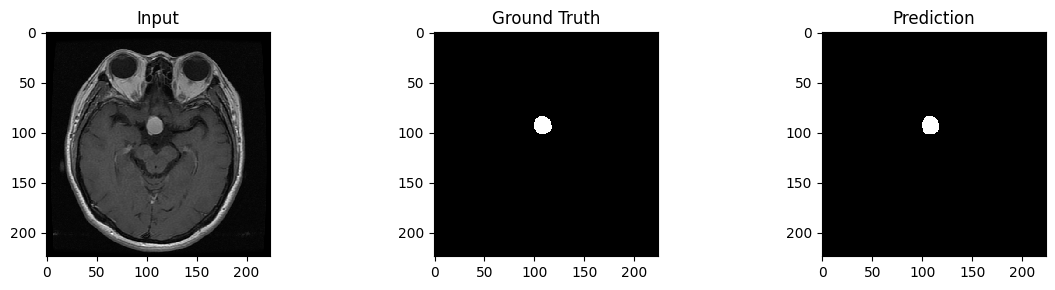

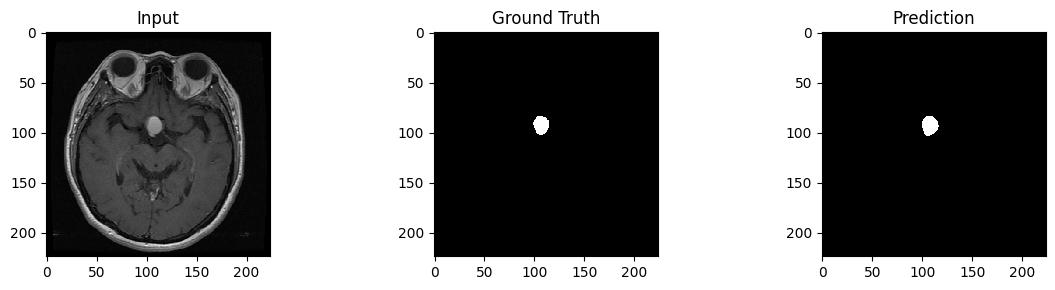

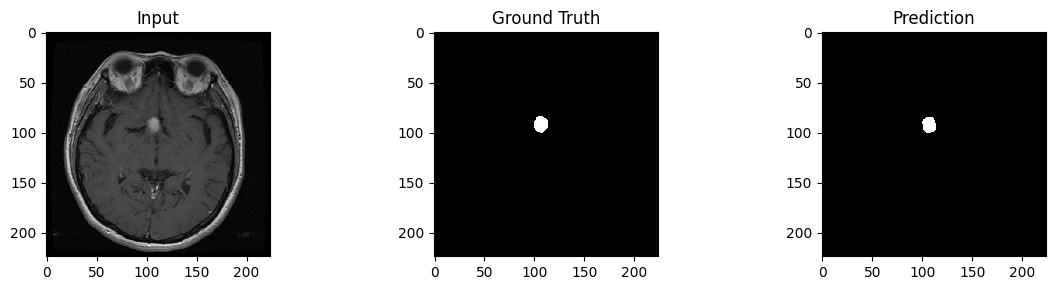

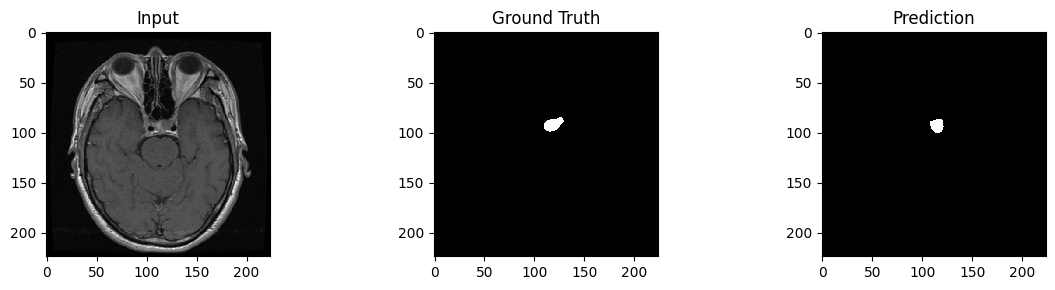

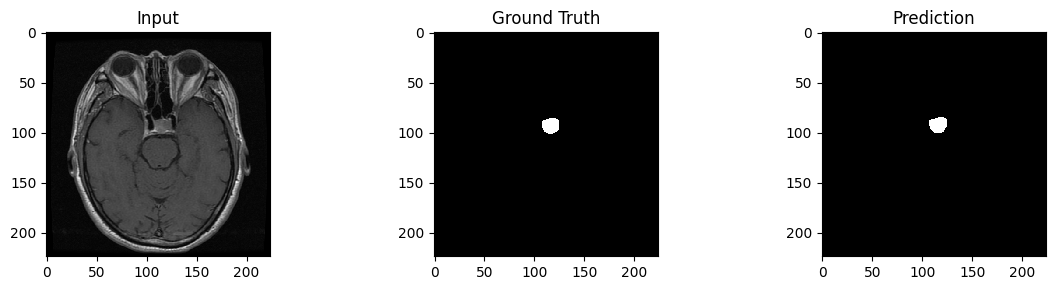

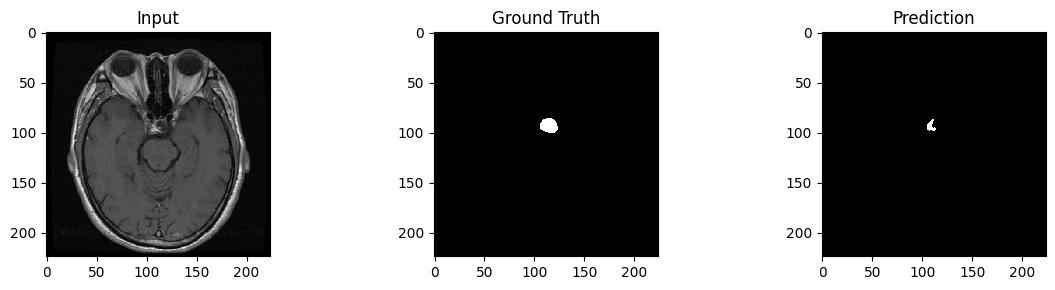

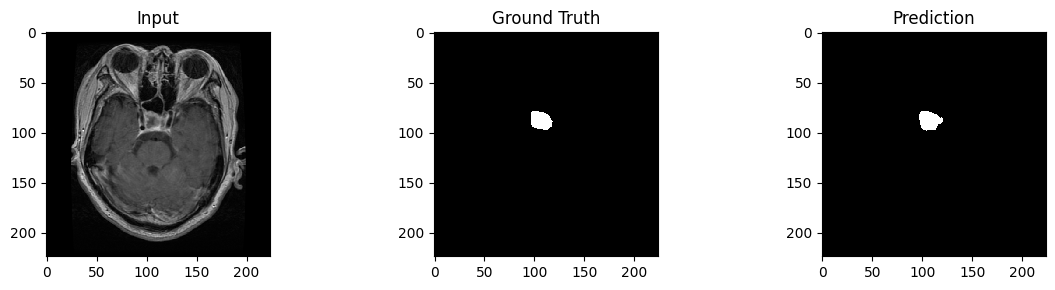

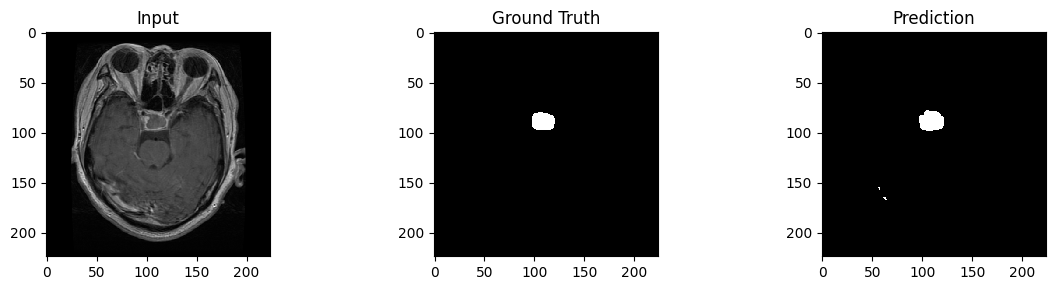

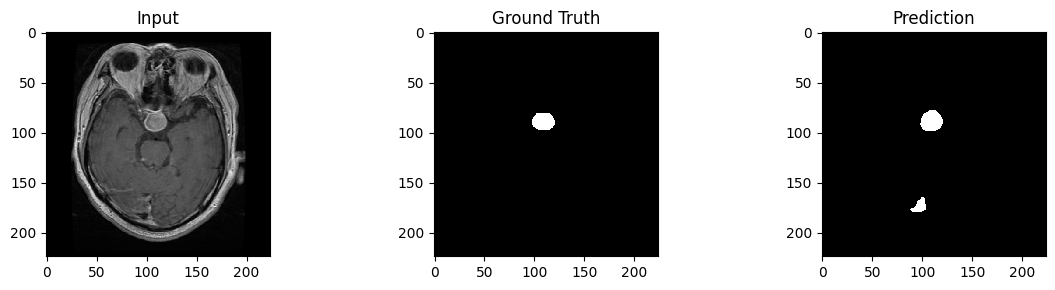

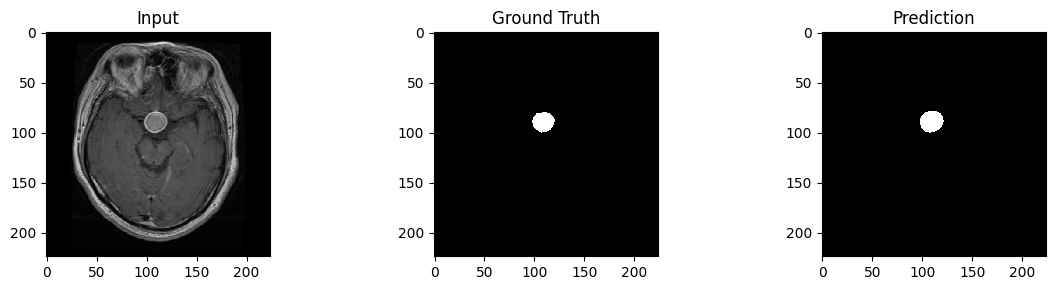

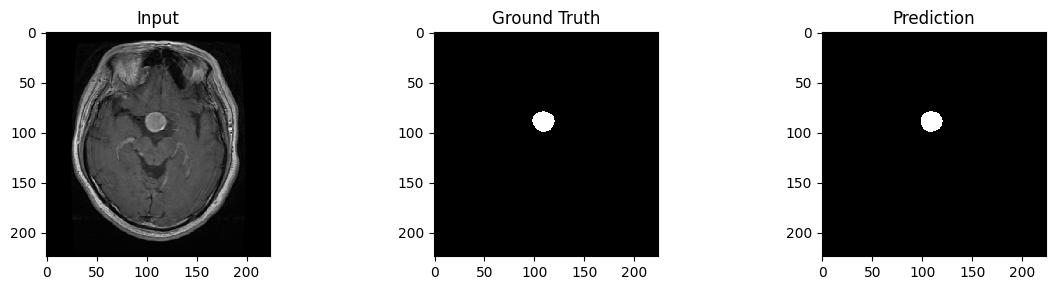

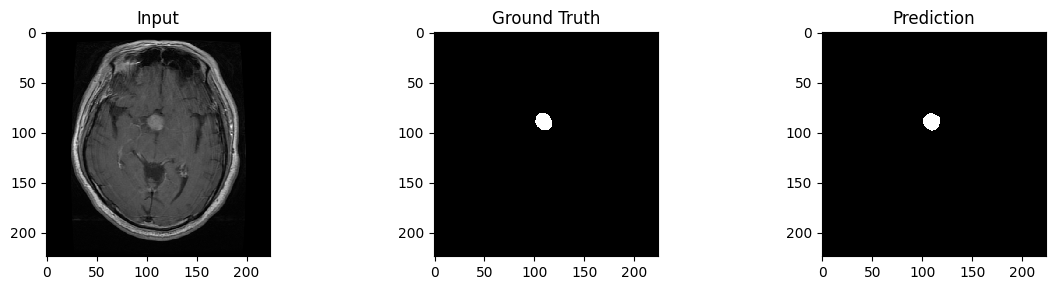

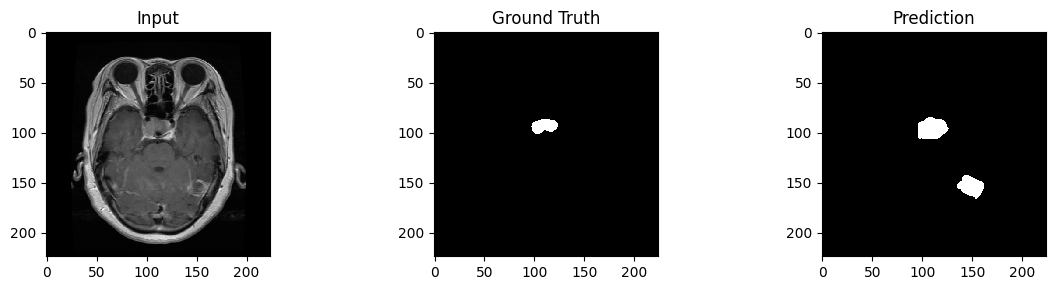

In [ ]:
#@title output samples (predictions compared to input and ground truth)

for i in range(30):
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input")

    plt.subplot(1, 3, 2)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")

    plt.subplot(1, 3, 3)
    plt.imshow(binary_preds[i].squeeze(), cmap='gray')
    plt.title("Prediction")

    plt.tight_layout()
    plt.show()